In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading all the datasets
traindf = pd.read_csv('/content/train.csv')
centerdf = pd.read_csv('/content/fulfilment_center_info.csv')
mealdf = pd.read_csv('/content/meal_info.csv')
testdf = pd.read_csv('/content/food_Demand_test.csv')

In [ ]:
traindf.head() # Displaying the first few rows of the tain dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [ ]:
centerdf.head() # Displaying the first few rows of the center dataset

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [ ]:
mealdf.head() # Displaying the first few rows of the meal dataset

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [ ]:
print("Statistical Summary of the Train dataset:")
traindf.describe()

Statistical Summary of the Train dataset:


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [ ]:
print("Information about the Train dataset:")
traindf.info()

Information about the Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [ ]:
# Feature Selection and Data Preprocessing
# Checking for missing values in train dataset
print("Missing values in train dataset:")
traindf.isnull().sum()

Missing values in train dataset:


,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0
num_orders,0


In [ ]:
# Checking for missing values in test dataset
print("Missing values in test dataset:")
testdf.isnull().sum()

Missing values in test dataset:


,0
id,0
week,0
center_id,0
meal_id,0
checkout_price,0
base_price,0
emailer_for_promotion,0
homepage_featured,0


In [ ]:
# Label encoding 'center_id' and 'meal_id'
# Converting these to category type and then use their codes
traindf['center_id'] = traindf['center_id'].astype('category').cat.codes
traindf['meal_id'] = traindf['meal_id'].astype('category').cat.codes

testdf['center_id'] = testdf['center_id'].astype('category').cat.codes
testdf['meal_id'] = testdf['meal_id'].astype('category').cat.codes

In [ ]:
traindf.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,23,22,136.83,152.29,0,0,177
1,1466964,1,23,26,136.83,135.83,0,0,270
2,1346989,1,23,38,134.86,135.86,0,0,189
3,1338232,1,23,29,339.50,437.53,0,0,54
4,1448490,1,23,42,243.50,242.50,0,0,40


In [ ]:
testdf.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,23,22,158.11,159.11,0,0
1,1127204,146,23,26,160.11,159.11,0,0
2,1212707,146,23,38,157.14,159.14,0,0
3,1082698,146,23,42,162.02,162.02,0,0
4,1400926,146,23,7,163.93,163.93,0,0


In [ ]:
# Splitting the train dataset into features and target variable
x = traindf.drop('num_orders', axis=1)  # Features
y = traindf['num_orders']  # Target variable

In [ ]:
# Displaying the final shape of the dataset prepared for training
print("Shape of the Features (X):", x.shape)
print("\nShape of the Target (y):", y.shape)

Shape of the Features (X): (456548, 8)

Shape of the Target (y): (456548,)


In [ ]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Training different models and evaluating their performance
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

In [ ]:
# 2. Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)

In [ ]:
# 3. Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

In [ ]:
# 4. XGBoost Regressor
xg_model = XGBRegressor()
xg_model.fit(x_train, y_train)
xg_pred = xg_model.predict(x_test)

In [1]:
# Function to calculate RMSE and R2 score
def evaluate_model(model_name, true_values, predicted_values):
    rmse = sqrt(mean_squared_error(true_values, predicted_values))
    r2 = r2_score(true_values, predicted_values)
    print(f"{model_name} - RMSE: {rmse}, R2 Score: {r2}")

In [ ]:
# Evaluating the models
evaluate_model("Linear Regression", y_test, lr_pred)
evaluate_model("Decision Tree Regressor", y_test, dt_pred)
evaluate_model("Random Forest Regressor", y_test, rf_pred)
evaluate_model("XGBoost Regressor", y_test, xg_pred)

Linear Regression - RMSE: 349.92422829186705, R2 Score: 0.19724527662483704
Decision Tree Regressor - RMSE: 236.96595434761792, R2 Score: 0.6318653041278197
Random Forest Regressor - RMSE: 179.70409643284836, R2 Score: 0.7882854055620016
XGBoost Regressor - RMSE: 173.5590002347905, R2 Score: 0.8025172352790833


In [ ]:
# Expanding the parameter grid and performing hyper parameter tuning
param_grid = {
    'n_estimators': [100, 200],  # Reduced options
    'learning_rate': [0.05, 0.1], # Reduced options
    'max_depth': [5, 8],          # Reduced options
    'subsample': [0.8, 1.0],      # Reduced options
    'colsample_bytree': [0.8, 1.0], # Reduced options
    'gamma': [0],                 # Fixed to a common value
    'reg_lambda': [1],            # Fixed to a common value
    'reg_alpha': [0]              # Fixed to a common value
}

# XGBoost base model
xgb = XGBRegressor(random_state=42, n_jobs=-1)

# Randomized Search CV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=5,  # Significantly reduced for speed
    scoring='neg_root_mean_squared_error',
    cv=2,      # Reduced cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# For early stopping, we need a validation set.
# Creating a small validation set from the training data for this purpose.
# Note: This is a simplified approach. For production, consider a dedicated validation split.
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

random_search.fit(x_train, y_train) # Using the original x_train, y_train for the search

# Best model and prediction
best_model = random_search.best_estimator_
best_model_pred = best_model.predict(x_test)

# Evaluation
print("Best Parameters:", random_search.best_params_)
print("RMSE:", sqrt(mean_squared_error(y_test, best_model_pred)))
print("R² Score:", r2_score(y_test, best_model_pred))

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
RMSE: 163.54523217981622
R² Score: 0.8246480226516724


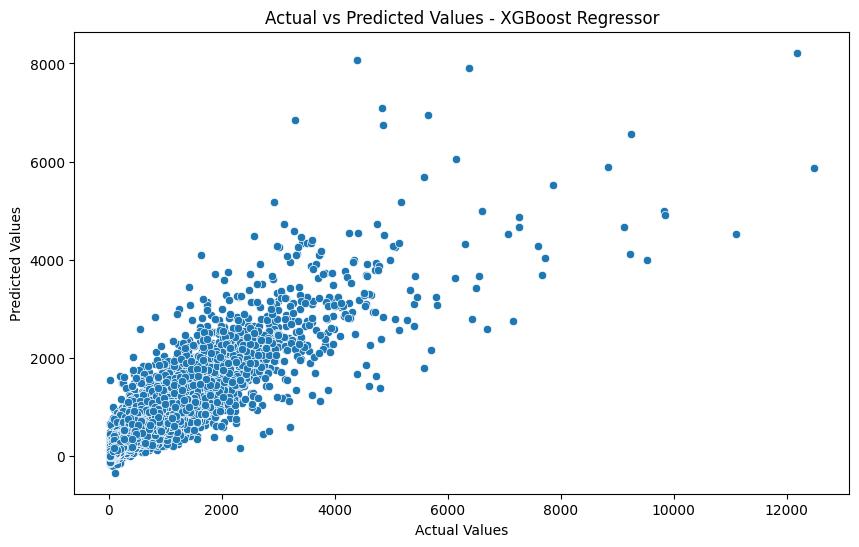

In [ ]:
# Plotting the Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=best_model_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - XGBoost Regressor')
plt.show()

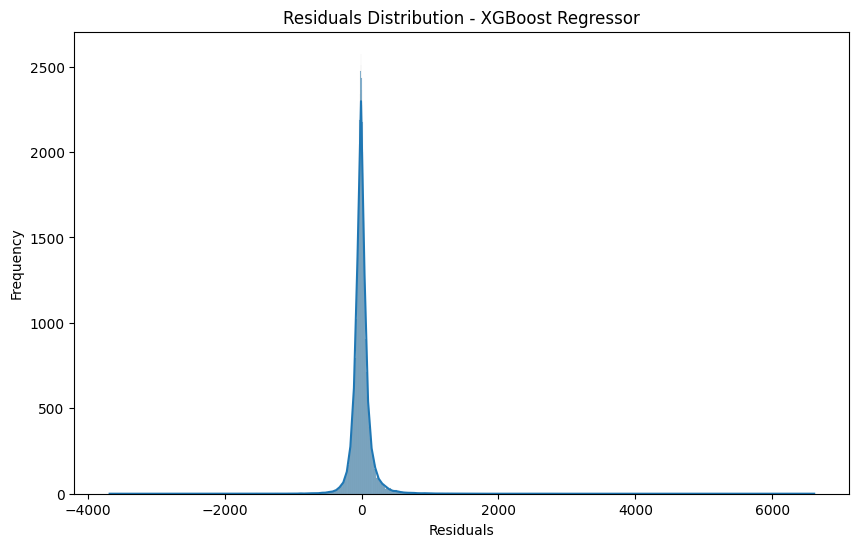

In [ ]:
# Residuals plot
residuals = y_test - best_model_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution - XGBoost Regressor')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

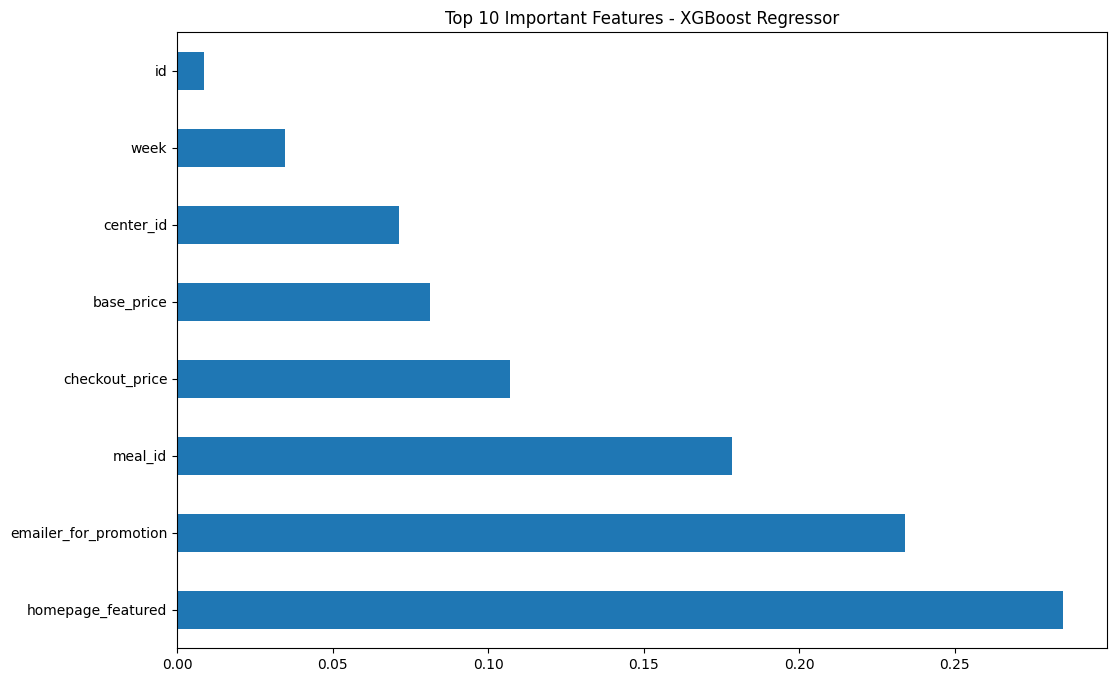

In [ ]:
# Results Visualization
# Feature Importance Visualization
feature_importances = pd.Series(best_model.feature_importances_, index=x.columns)
plt.figure(figsize=(12, 8))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - XGBoost Regressor')
plt.show()

In [1]:
# Predictions Visualization
# Displaying a sample of actual vs predicted values
sample_results = pd.DataFrame({'Actual': y_test, 'Predicted': best_model_pred})
sample_results = sample_results.reset_index(drop=True)
print("Sample Actual vs Predicted Values:")
sample_results.head(10)

NameError: name 'pd' is not defined

In [ ]:
with open('food_demand_forecast.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
from google.colab import files
files.download('food_demand_forecast.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>